# load calour

In [1]:
import calour as ca
% matplotlib notebook

we want to get info messages (10 is debug, 20 is info, 30 is warning)

In [2]:
ca.set_log_level(20)

# Load the dataset
## data is from: 
**The gut microbiome of the sea urchin, Lytechinus variegatus, from its natural habitat demonstrates selective attributes of microbial taxa and predictive metabolic profiles**

*Joseph A. Hakim  Hyunmin Koo  Ranjit Kumar  Elliot J. Lefkowitz  Casey D. Morrow Mickie L. Powell  Stephen A. Watts  Asim K. Bej*

*FEMS Microbiol Ecol (2016) 92 (9)*

It is an amplicon experiment, so we use `load_amplicon`. This gives us some more amplicon experiment specific functions and defaults (i.e. plotting by taxonomy, etc.)

We load the biom table and mapping file.

Specify normalization depth to 10000 reads/sample

And filter away samples with < 1000 reads

By default the data is loaded as sparse scipy matrix. Can use dense instead by setting `sparse=False`

In [4]:
exp = ca.read_amplicon('data/sea-urchin.biom', 'data/sea-urchin.sample.txt', normalize=10000, filter_reads=1000)

2017-03-12 23:13:43 INFO loaded 18 samples, 16909 observations
2017-03-12 23:13:43 INFO 15 remaining


In [5]:
exp

AmpliconExperiment sea-urchin.biom with 15 samples, 16909 features

## An Experiment (which AmpliconExperiment is a subclass) contains 3 basic attributes:
- data : an S (number samples) x F (number features) 2d numpy array or scipy.Sparse matrix
- sample_metadata : pandas.DataFrame. Stores all the per-sample information. Index is the SampleID
- feature_metadata : pandas.DataFrame. Stores all the per-feature information. For AmpliconExperiment, index is the sequence

Data, sample_metadata and feature_metadata are synchronized, so position (s,f) in the data matrix corresponds to position s in the sample_metadata and position f in the feature_metadata

In [6]:
exp.sample_metadata.columns

Index(['#SampleID', 'BioSample_s', 'Experiment_s', 'MBases_l', 'MBytes_l',
       'Run_s', 'SRA_Sample_s', 'Sample_Name_s', 'isolation_source_s', 'type',
       'Assay_Type_s', 'AssemblyName_s', 'BioProject_s', 'BioSampleModel_s',
       'Center_Name_s', 'Consent_s', 'InsertSize_l', 'LibraryLayout_s',
       'LibrarySelection_s', 'LibrarySource_s', 'Library_Name_s', 'LoadDate_s',
       'Organism_s', 'Platform_s', 'ReleaseDate_s', 'SRA_Study_s',
       'collection_date_s', 'cultured_location_s', 'g1k_analysis_group_s',
       'g1k_pop_code_s', 'geo_loc_name_s', 'host_s', 'lat_lon_s', 'source_s',
       '_calour_original_abundance'],
      dtype='object')

# Analysis

## Cluster the features (bacteria)
So similar behaving features will be close to each other.

We also specify `min_abundance=10` to filter away features with less than 10 (normalized) reads total over all samples.

This makes clustering and analysis faster, as well as adding more power (as the < 10 reads total features don't contain a lot of information)

In [7]:
exp_c = exp.cluster_features(min_abundance=10)

2017-03-12 23:13:52 INFO 759 remaining


In [8]:
exp_c

AmpliconExperiment sea-urchin.biom with 15 samples, 759 features

## let's look at the data
We will use two databases:
'sponge' - the sponge-EMP automatic database
'dbbact' - the manual annotation database

<IPython.core.display.Javascript object>


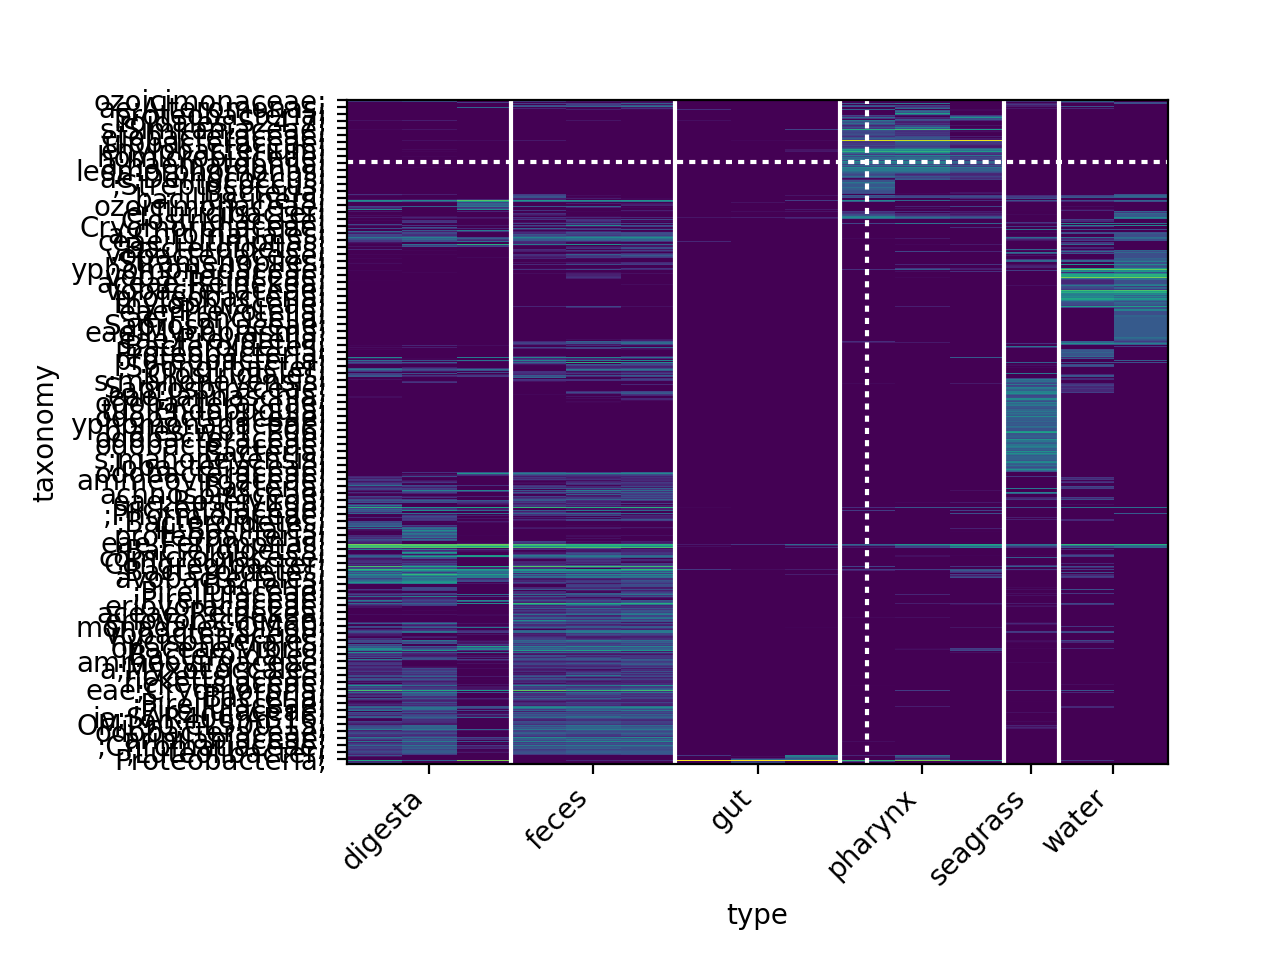

In [12]:
exp_c.plot_sort('type', gui='jupyter', databases=['sponge','dbbact'])

## we see the pharynx samples are a lot like Urine samples from a previous study...
turns out both studies sequenced in the same university